<a href="https://colab.research.google.com/github/selvamani1992/Breast_Cancer_Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction

**Problem Statement:**

Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques. Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.


Google Drive Connection Hosting

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Import neccessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, r2_score, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_validate

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/cancer.csv')
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
dataset.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True) #removing unwanted columns

In [ ]:
dataset.shape

(569, 31)

In [ ]:
dataset.isnull().sum() #checking null values in each column

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataset.duplicated().sum() #checking duplicated columns in dataset

0

In [ ]:
dataset.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# checking values count on target to check whether the dataset is balanced or not
dataset.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

it is almost a balanced dataset - (60:40)

## EDA

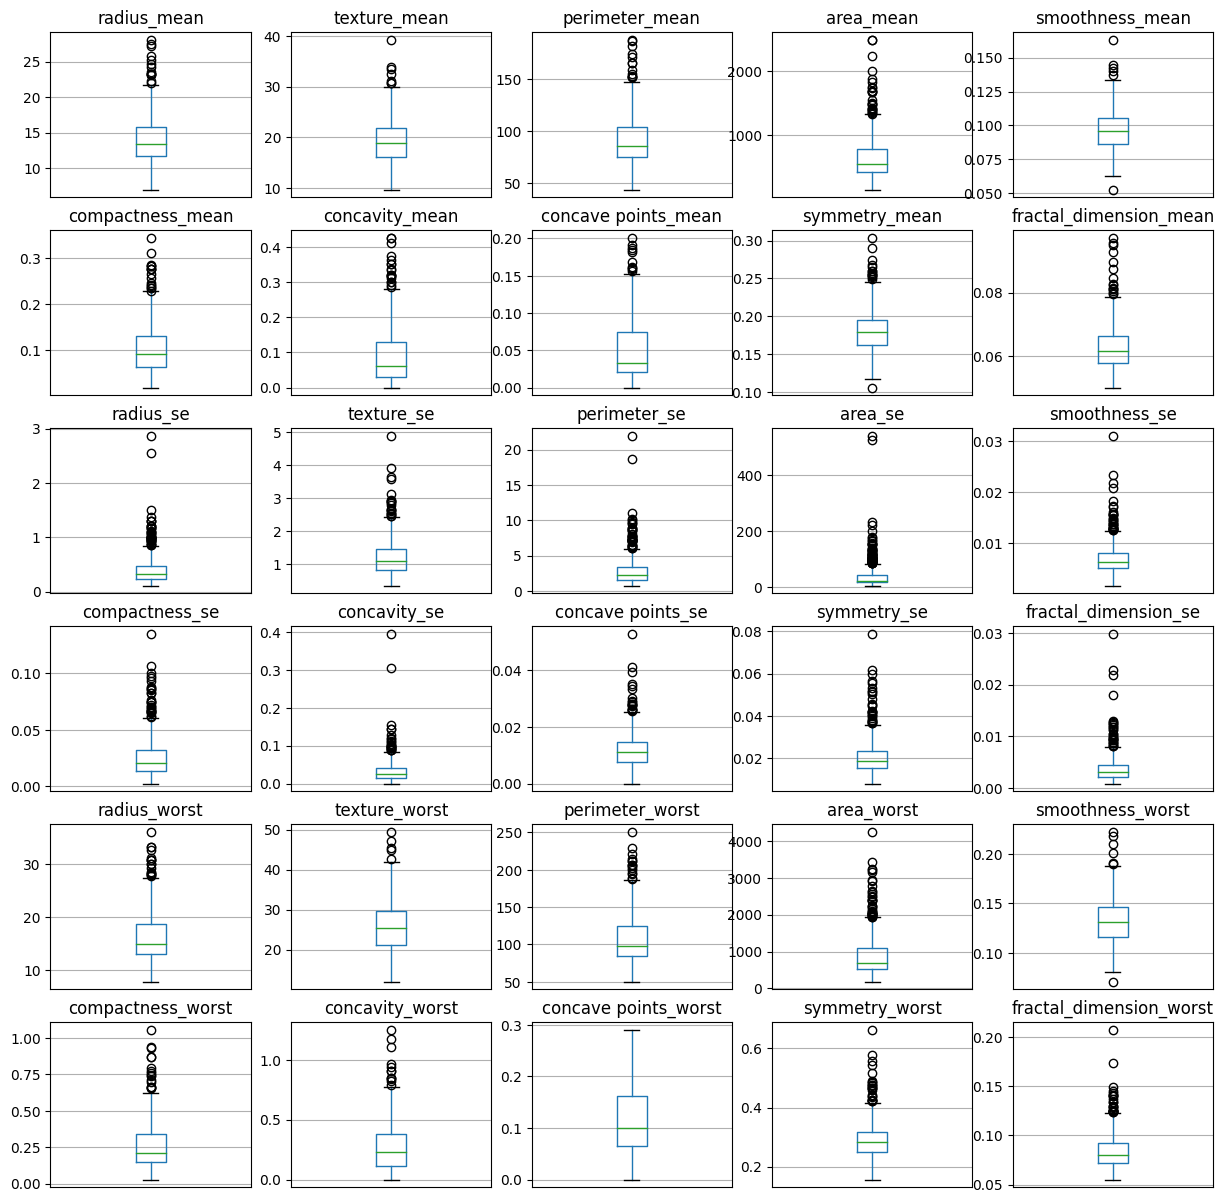

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(dataset.columns[1:]):
  dataset.boxplot(column=feature, ax=axes[i])
  axes[i].set_title(feature)
  axes[i].get_xaxis().set_visible(False)
plt.show()

In [ ]:
plot1 = dataset.iloc[:,:11]
plot1

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

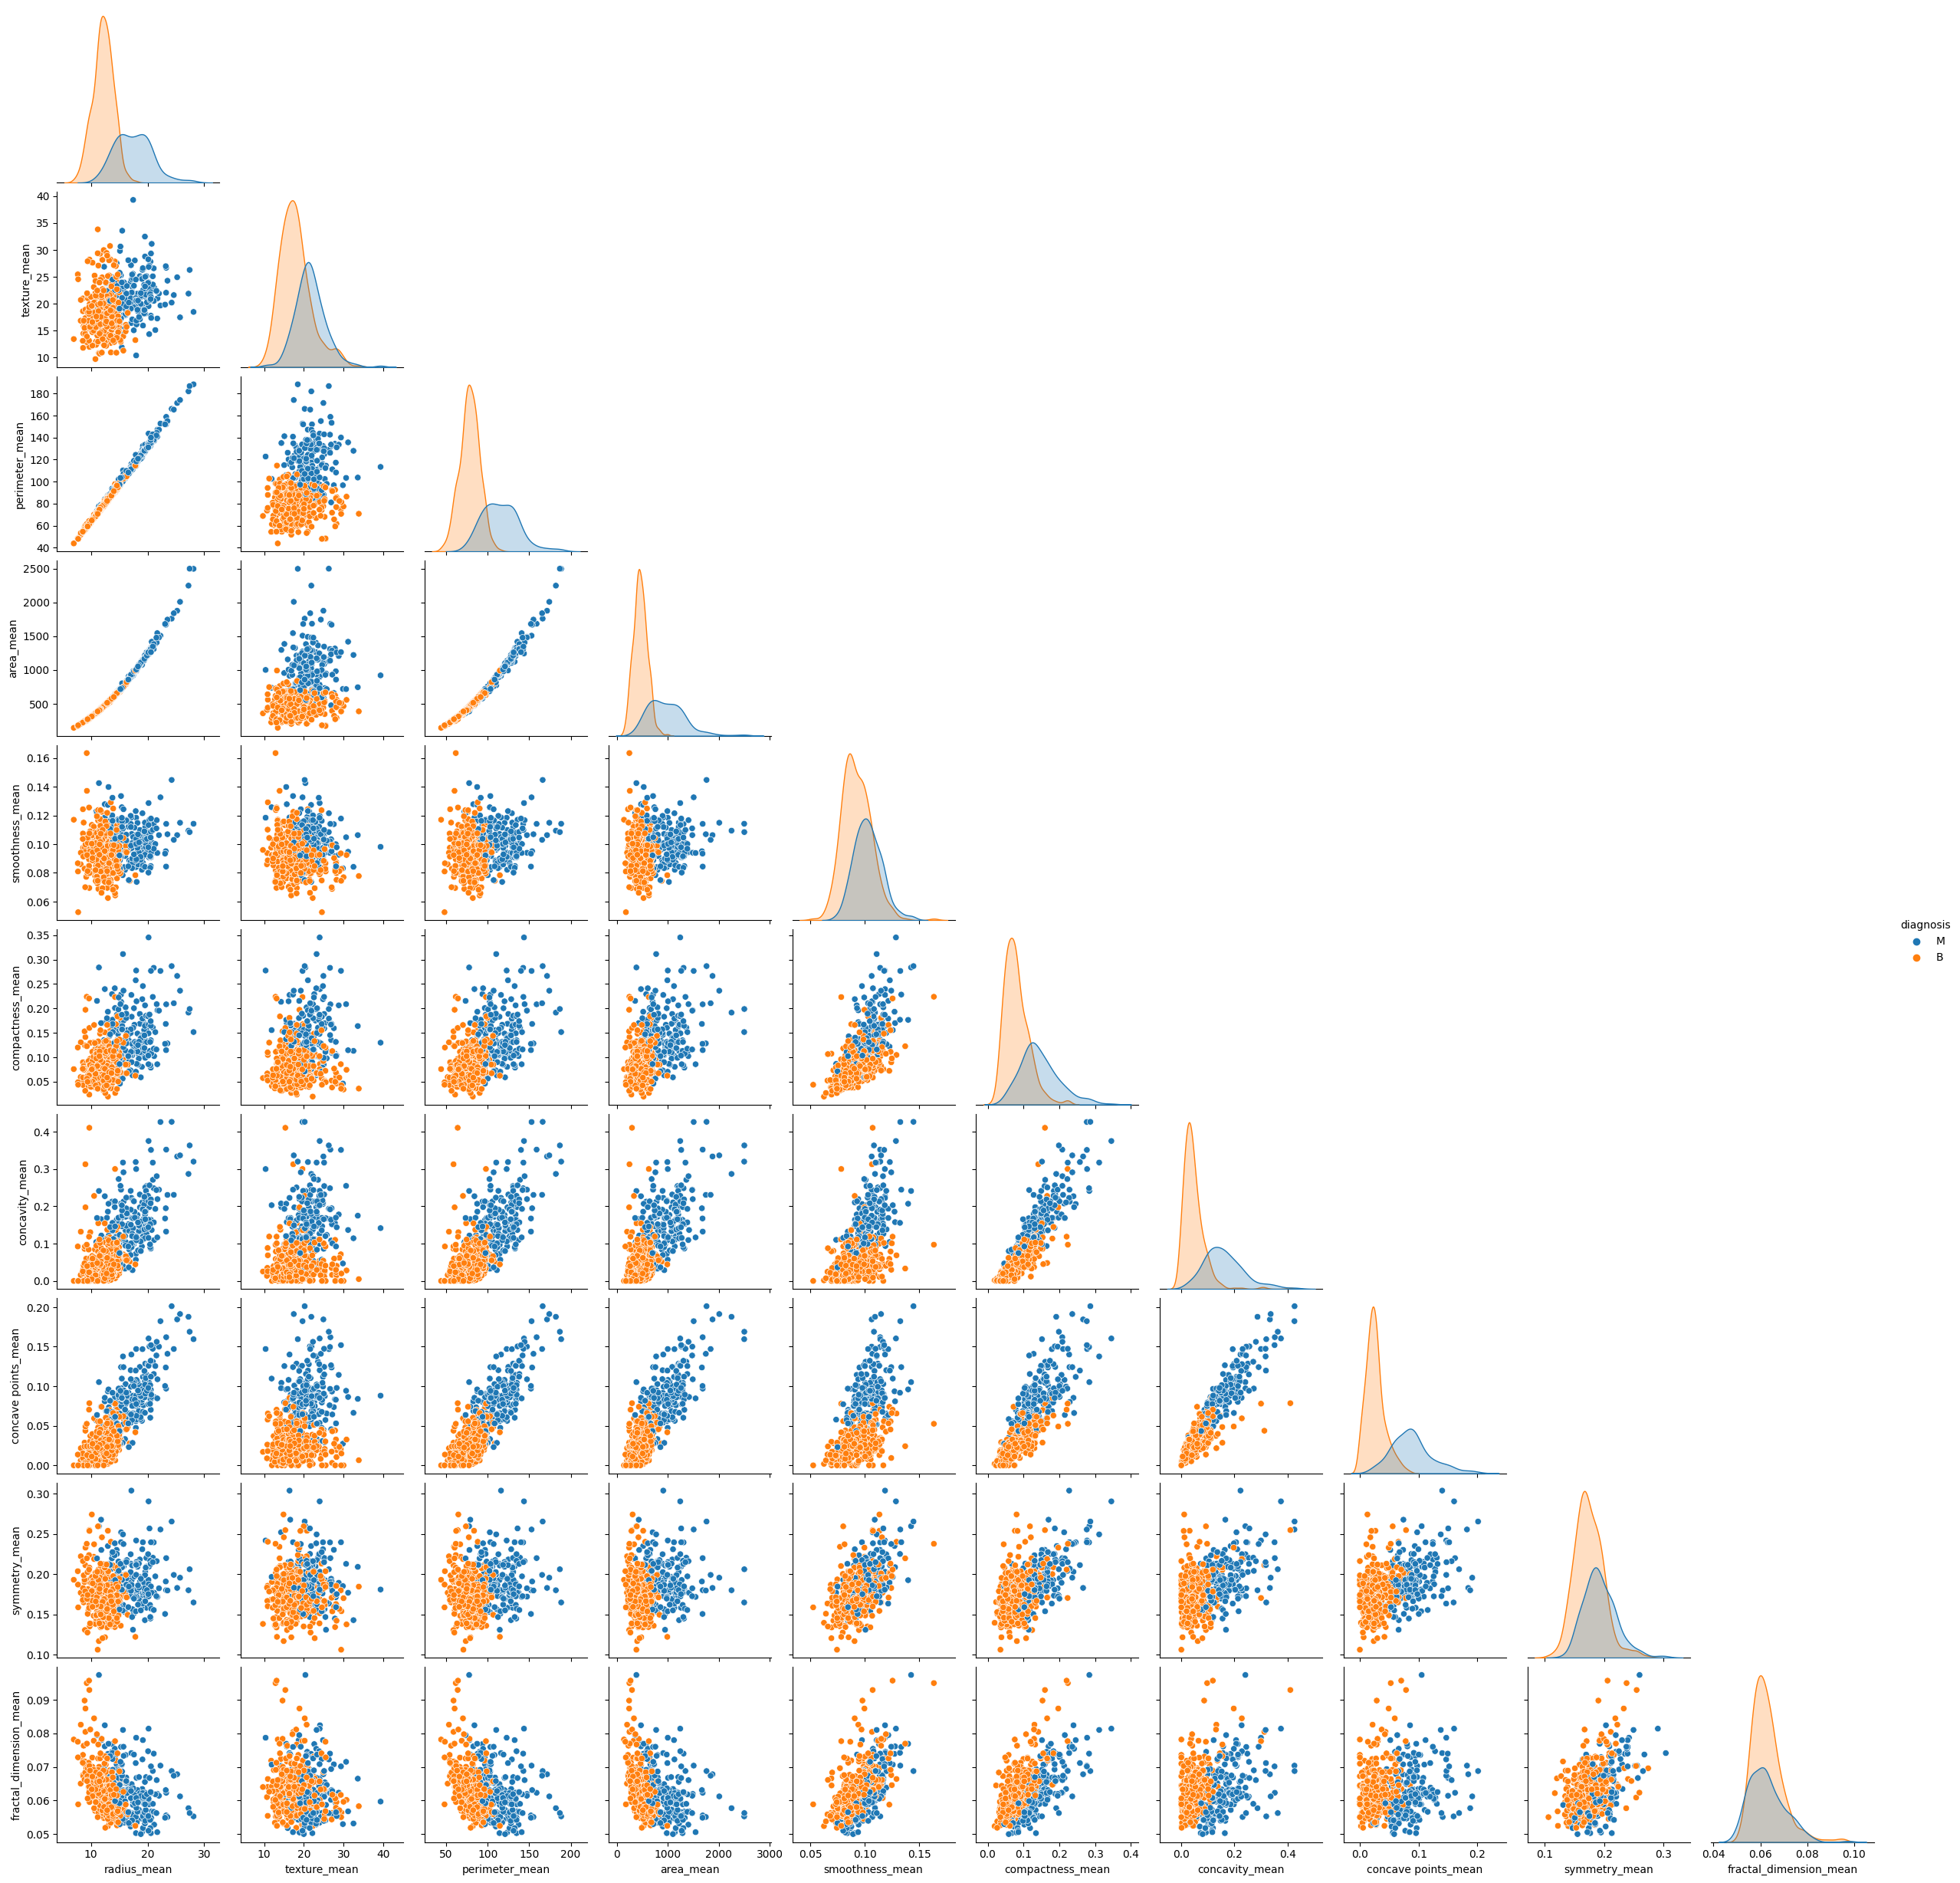

In [ ]:
sns.pairplot(plot1,hue='diagnosis',corner=True)
plt.savefig('pairplot1.png')
plt.show()

In [ ]:
plot2 = dataset[['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se']]
plot2

diagnosis  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0           M     1.0950      0.9053         8.589   153.40       0.006399   
1           M     0.5435      0.7339         3.398    74.08       0.005225   
2           M     0.7456      0.7869         4.585    94.03       0.006150   
3           M     0.4956      1.1560         3.445    27.23       0.009110   
4           M     0.7572      0.7813         5.438    94.44       0.011490   
..        ...        ...         ...           ...      ...            ...   
564         M     1.1760      1.2560         7.673   158.70       0.010300   
565         M     0.7655      2.4630         5.203    99.04       0.005769   
566         M     0.4564      1.0750         3.425    48.55       0.005903   
567         M     0.7260      1.5950         5.772    86.22       0.006522   
568         B     0.3857      1.4280         2.548    19.15       0.007189   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0           0.04904       0.05373            0.01587      0.03003   
1           0.01308       0.01860            0.01340      0.01389   
2           0.04006       0.03832            0.02058      0.02250   
3           0.07458       0.05661            0.01867      0.05963   
4           0.02461       0.05688            0.01885      0.01756   
..              ...           ...                ...          ...   
564         0.02891       0.05198            0.02454      0.01114   
565         0.02423       0.03950            0.01678      0.01898   
566         0.03731       0.04730            0.01557      0.01318   
567         0.06158       0.07117            0.01664      0.02324   
568         0.00466       0.00000            0.00000      0.02676   

     fractal_dimension_se  
0                0.006193  
1                0.003532  
2                0.004571  
3                0.009208  
4                0.005115  
..                    ...  
564              0.004239  
565              0.002498  
566              0.003892  
567              0.006185  
568              0.002783  

[569 rows x 11 columns]

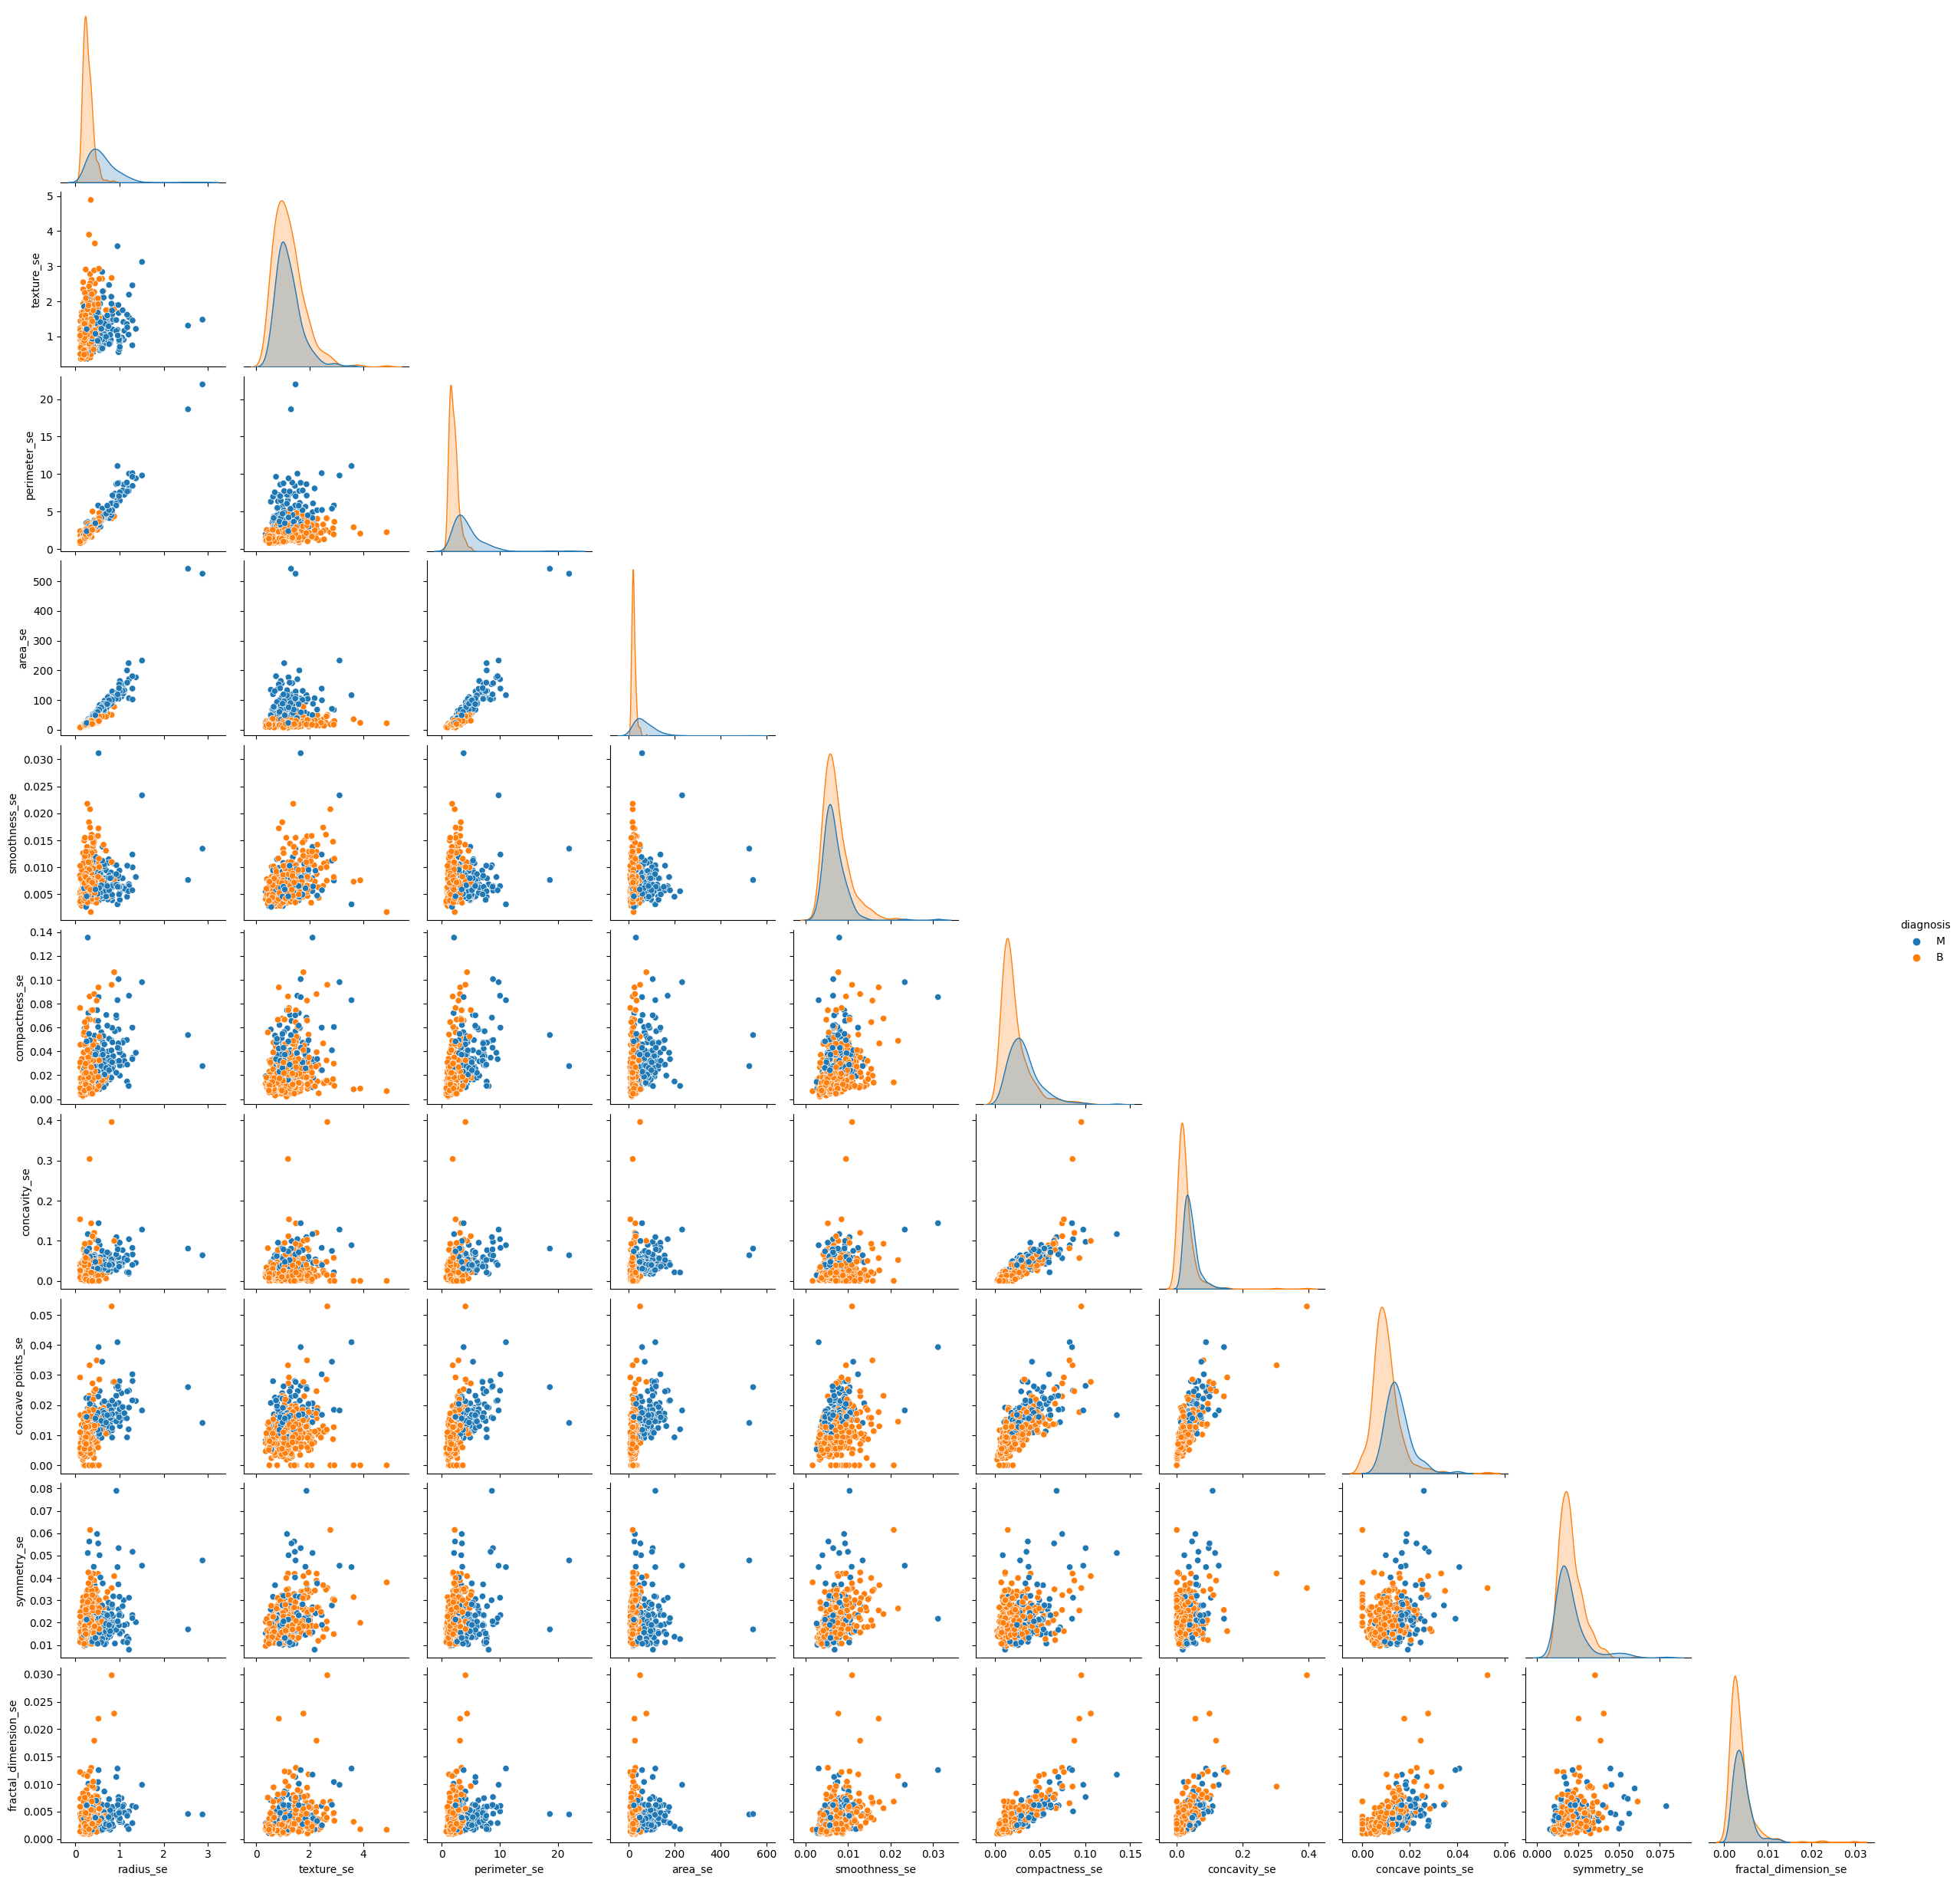

In [ ]:
sns.pairplot(plot2,hue='diagnosis',corner=True)
plt.savefig('pairplot2.png')
plt.show()

In [ ]:
plot3 = dataset[['diagnosis','radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]
plot3

diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0           M        25.380          17.33           184.60      2019.0   
1           M        24.990          23.41           158.80      1956.0   
2           M        23.570          25.53           152.50      1709.0   
3           M        14.910          26.50            98.87       567.7   
4           M        22.540          16.67           152.20      1575.0   
..        ...           ...            ...              ...         ...   
564         M        25.450          26.40           166.10      2027.0   
565         M        23.690          38.25           155.00      1731.0   
566         M        18.980          34.12           126.70      1124.0   
567         M        25.740          39.42           184.60      1821.0   
568         B         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[569 rows x 11 columns]

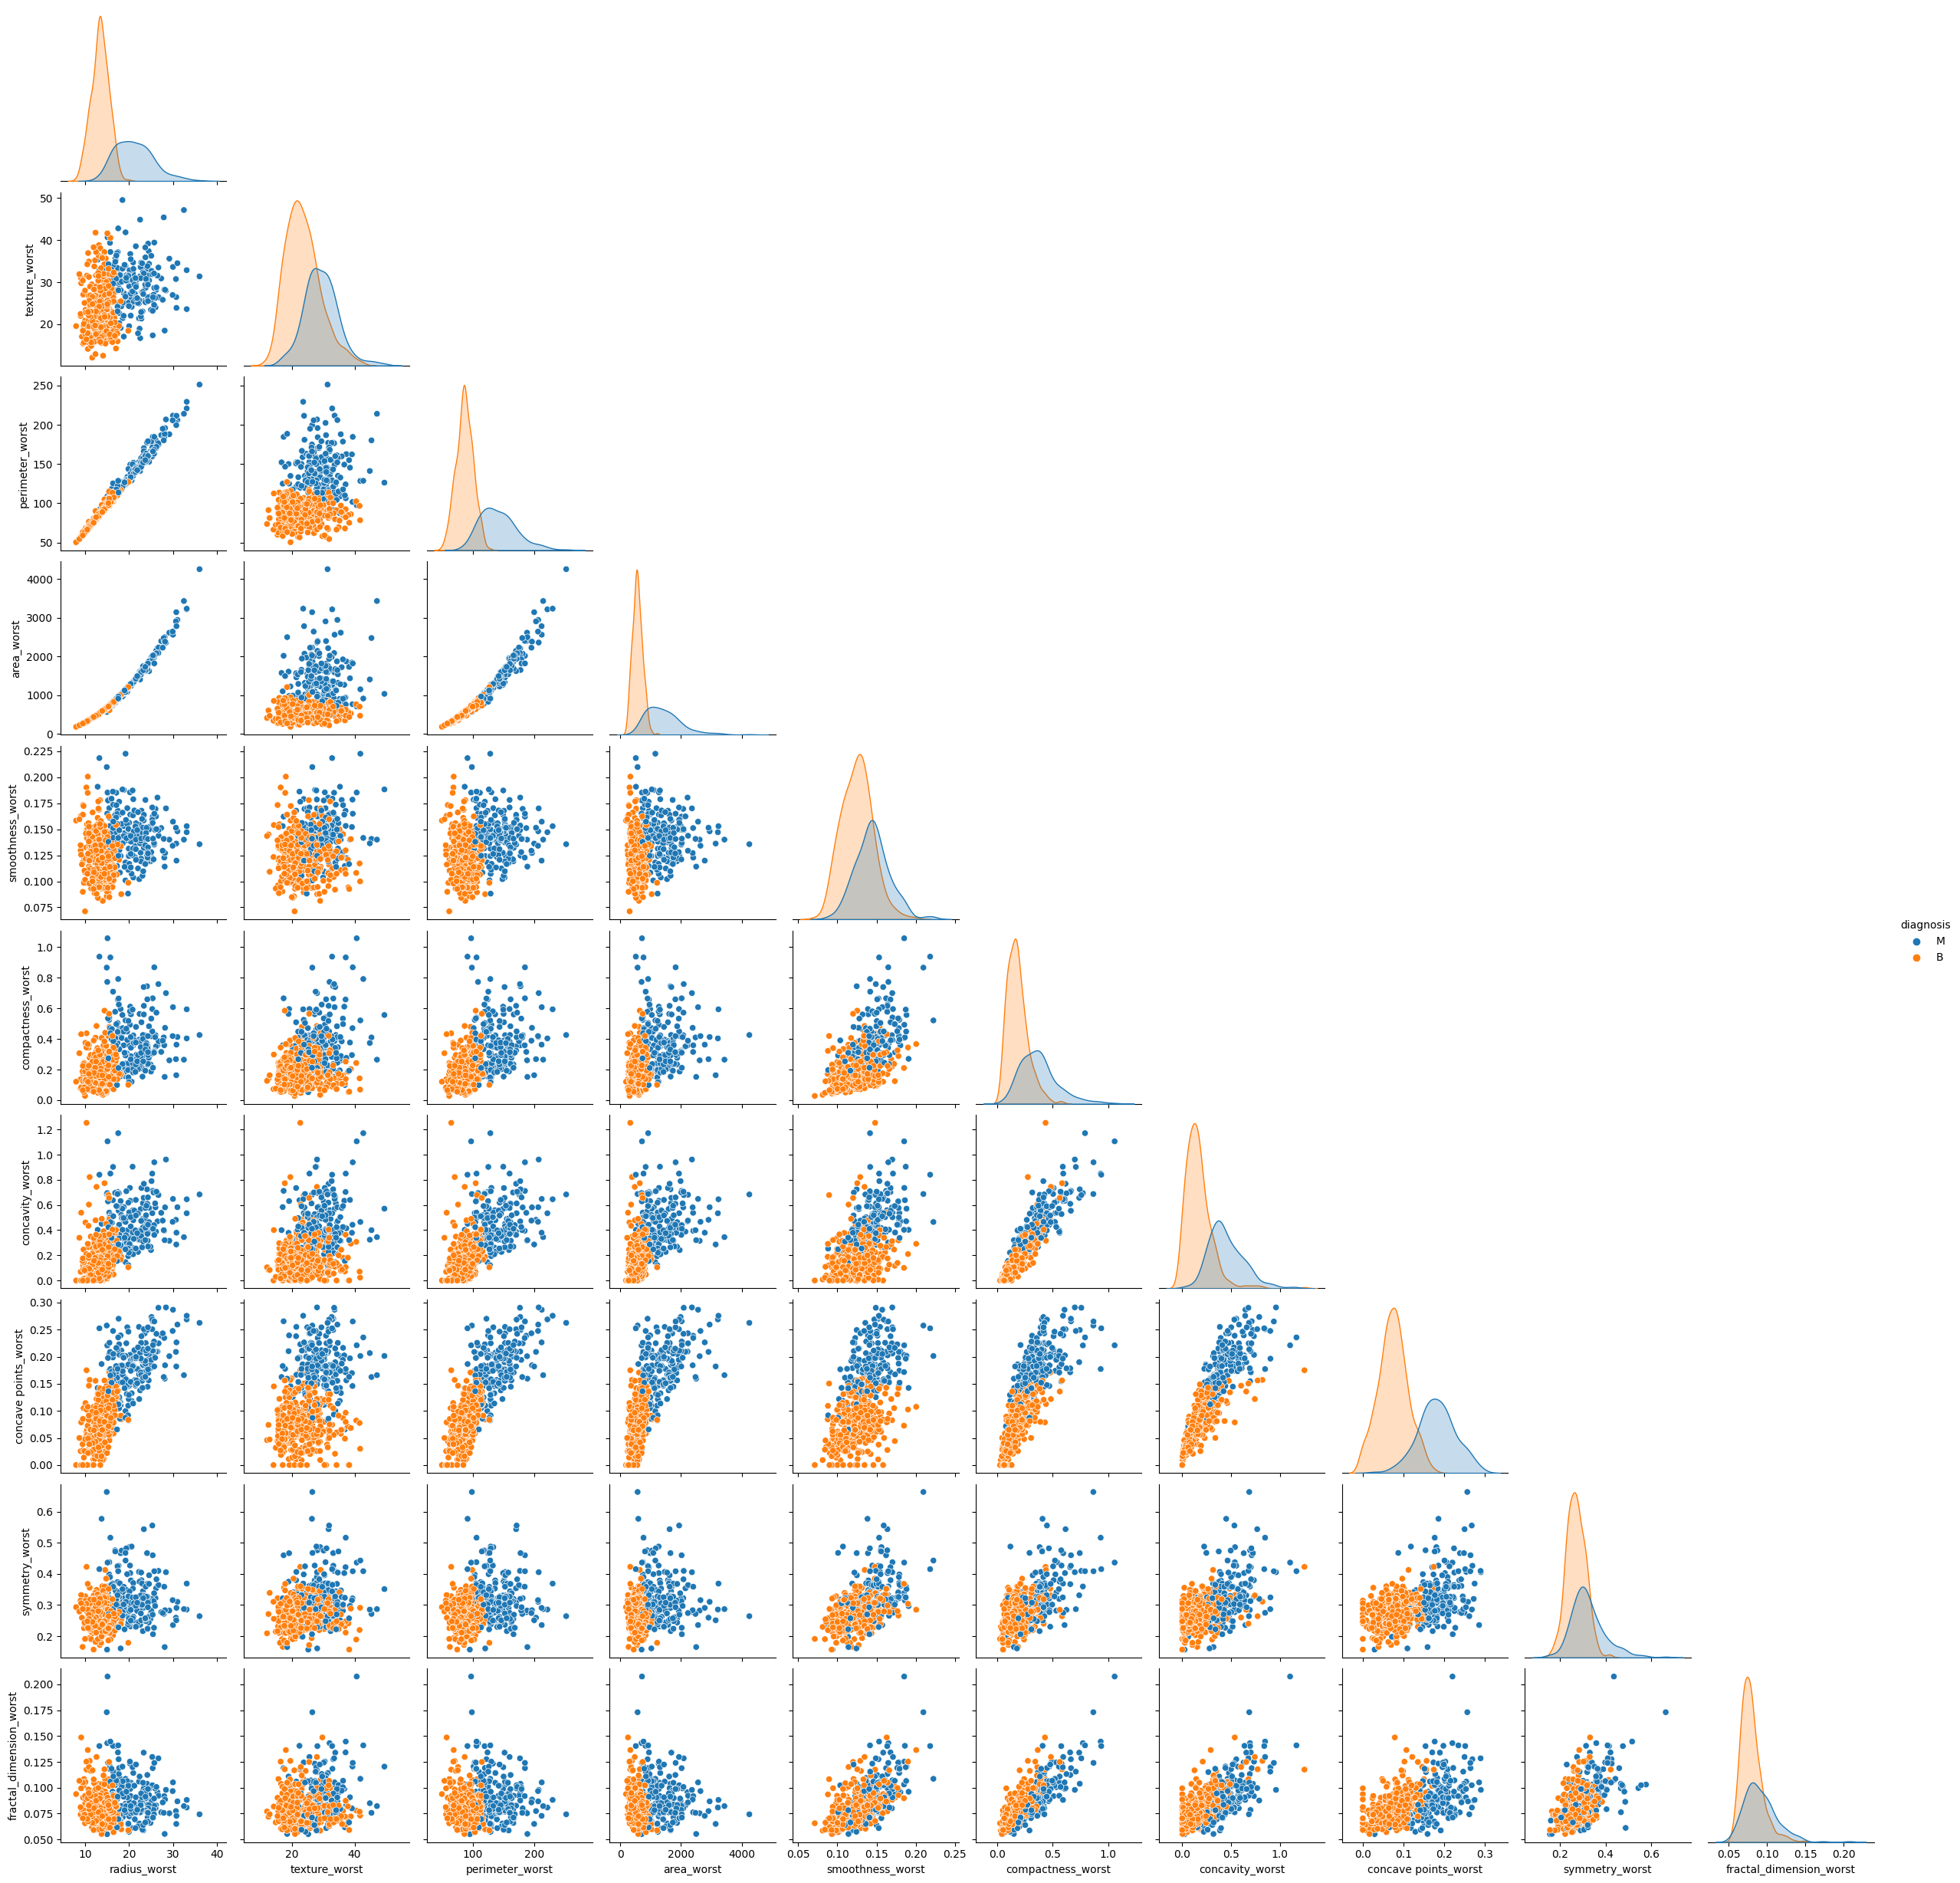

In [ ]:
sns.pairplot(plot3,hue='diagnosis',corner=True)
plt.savefig('pairplot3.png')
plt.show()

In [ ]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
columns = [['diagnosis',	'radius_mean',	'radius_se',	'radius_worst'],
['diagnosis',	'texture_mean',	'texture_se',	'texture_worst'],
['diagnosis',	'perimeter_mean',	'perimeter_se',	'perimeter_worst'],
['diagnosis',	'area_mean',	'area_se',	'area_worst'],
['diagnosis',	'smoothness_mean',	'smoothness_se',	'smoothness_worst'],
['diagnosis',	'compactness_mean',	'compactness_se',	'compactness_worst'],
['diagnosis',	'concavity_mean',	'concavity_se',	'concavity_worst'],
['diagnosis',	'concave points_mean', 'concave points_se',	'concave points_worst'],
['diagnosis',	'symmetry_mean',	'symmetry_se',	'symmetry_worst'],
['diagnosis',	'fractal_dimension_mean',	'fractal_dimension_se',	'fractal_dimension_worst']]


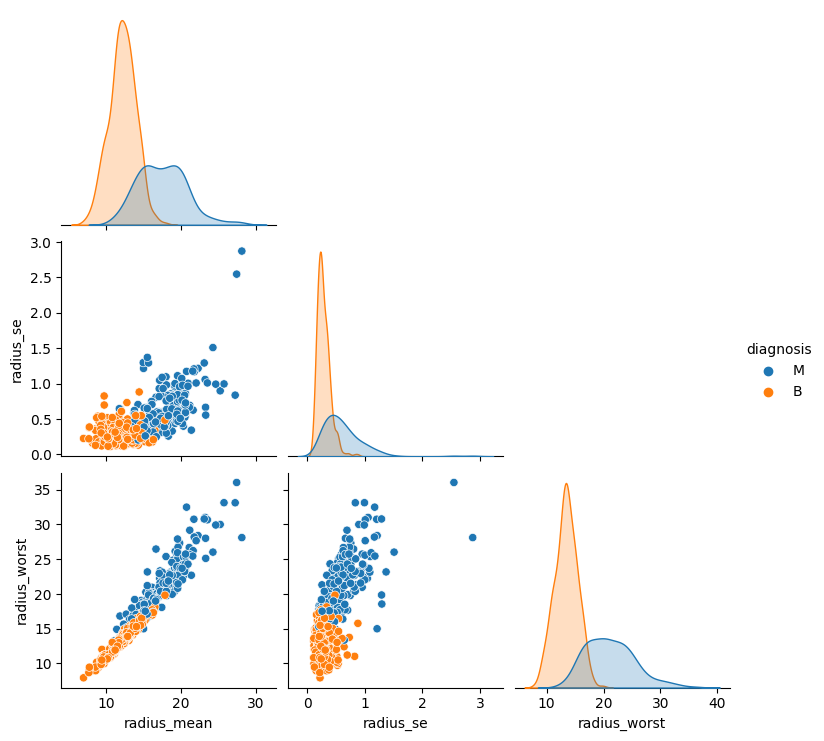

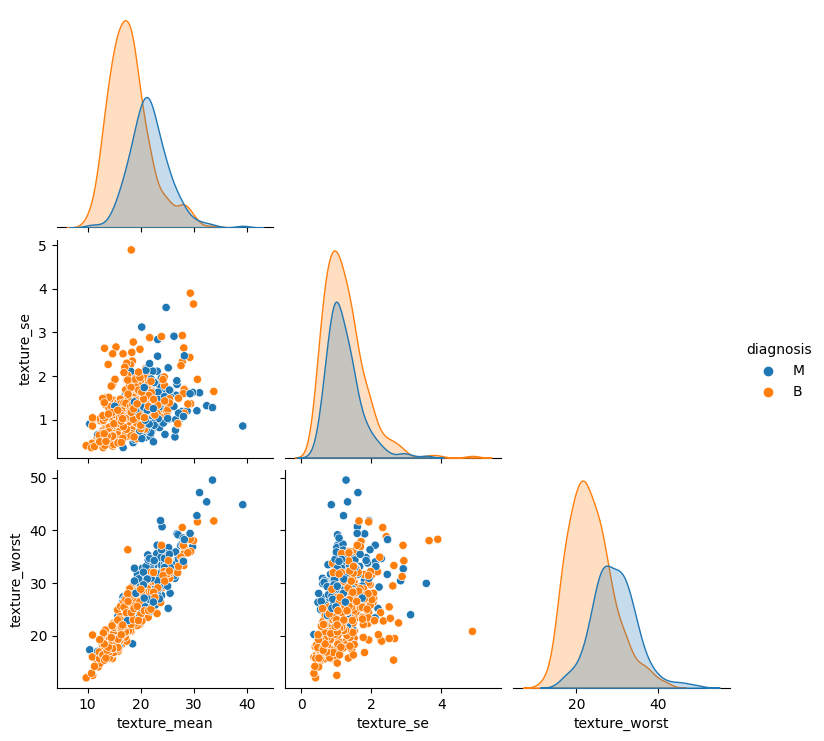

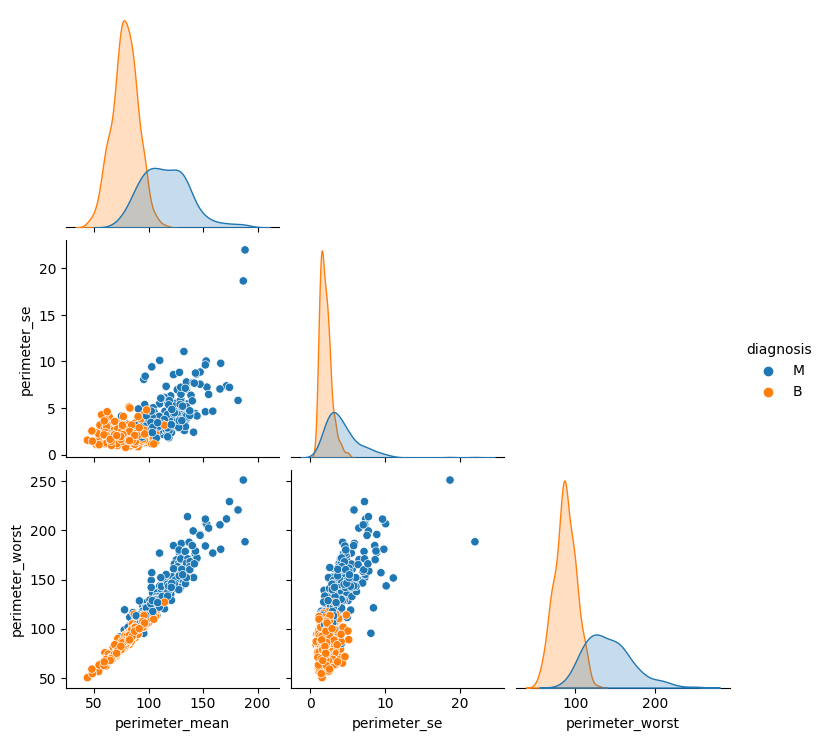

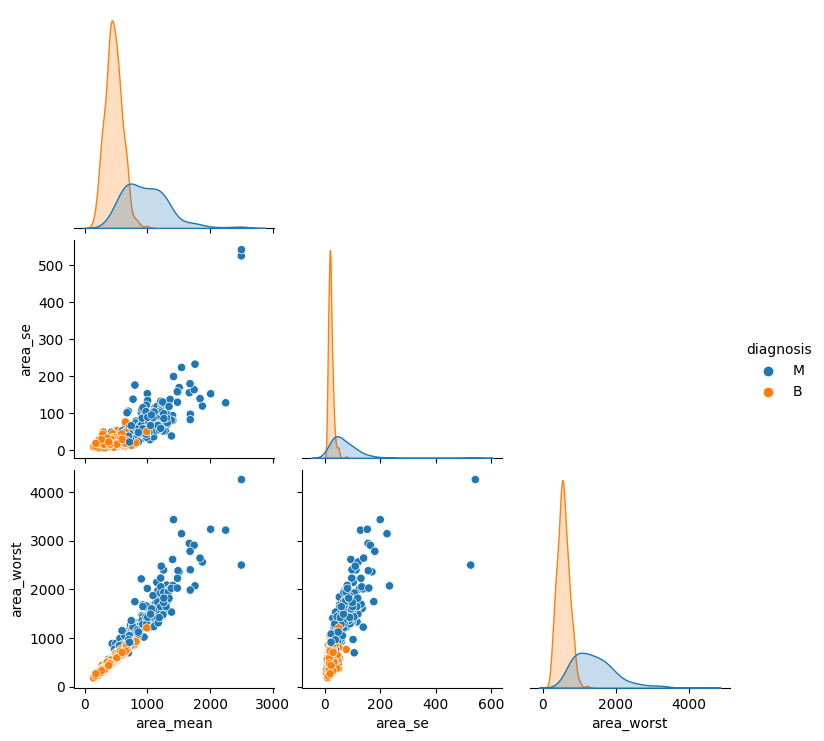

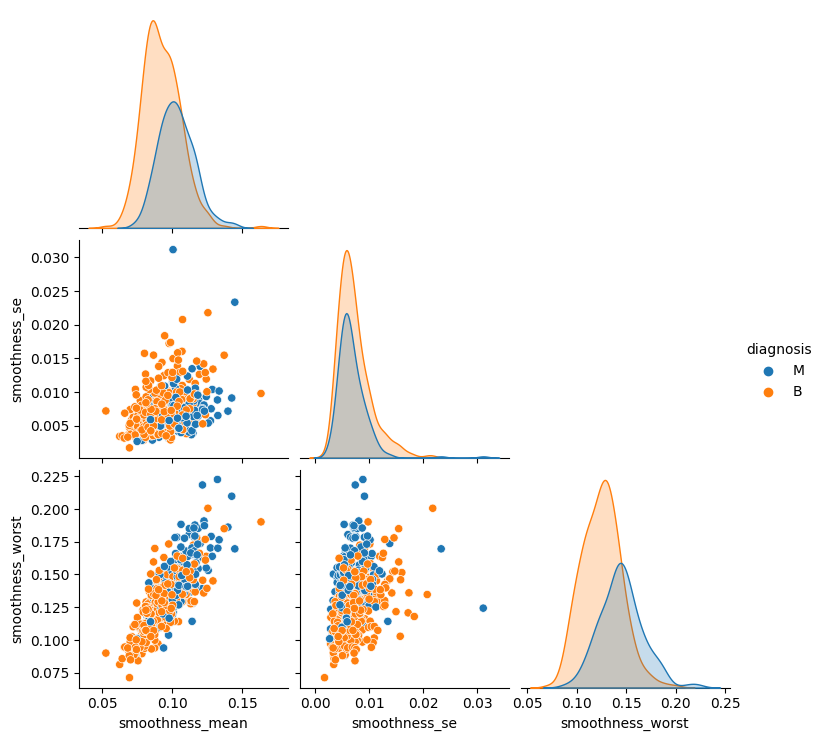

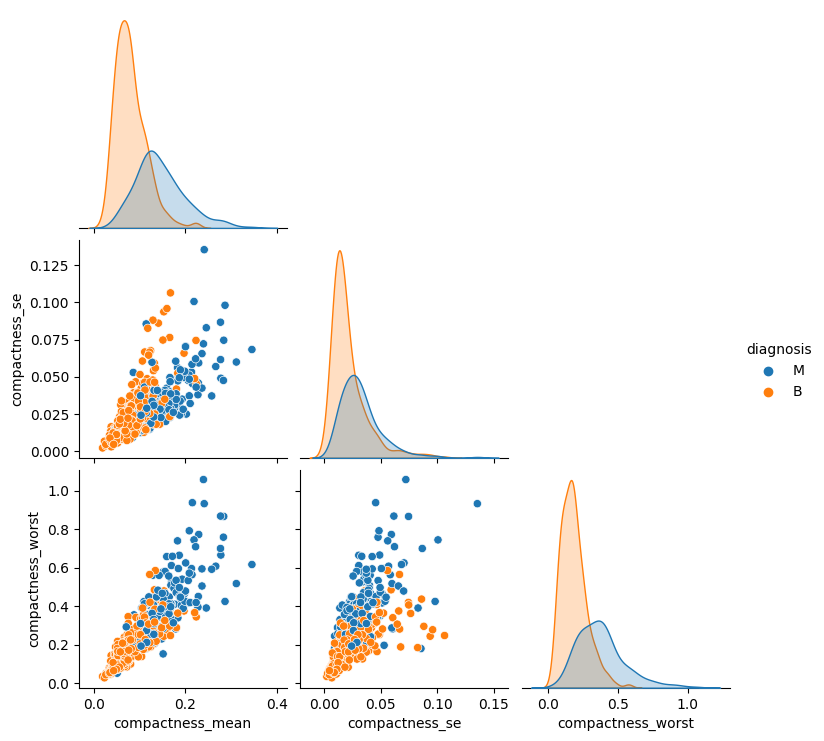

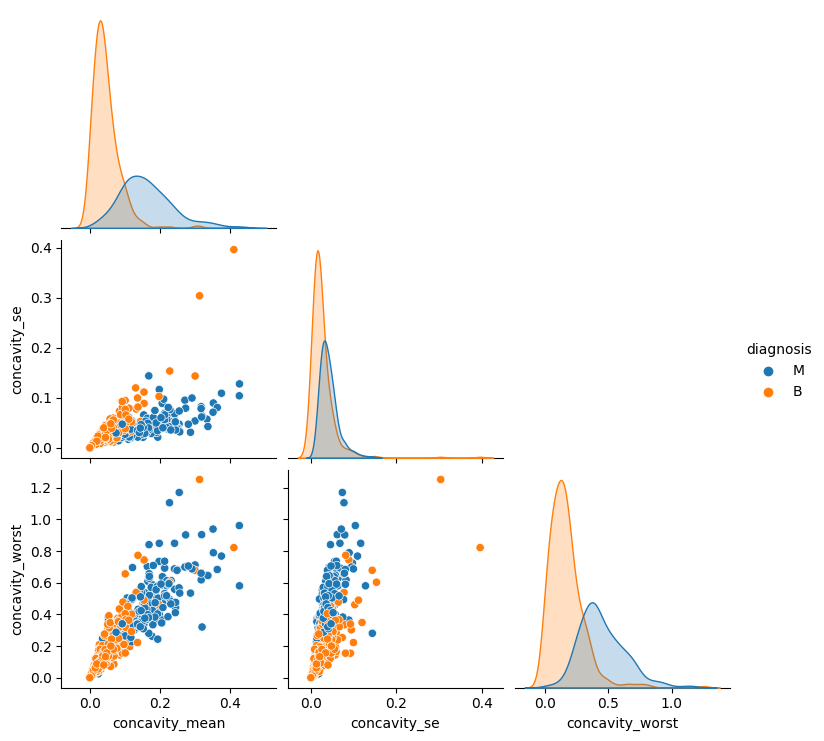

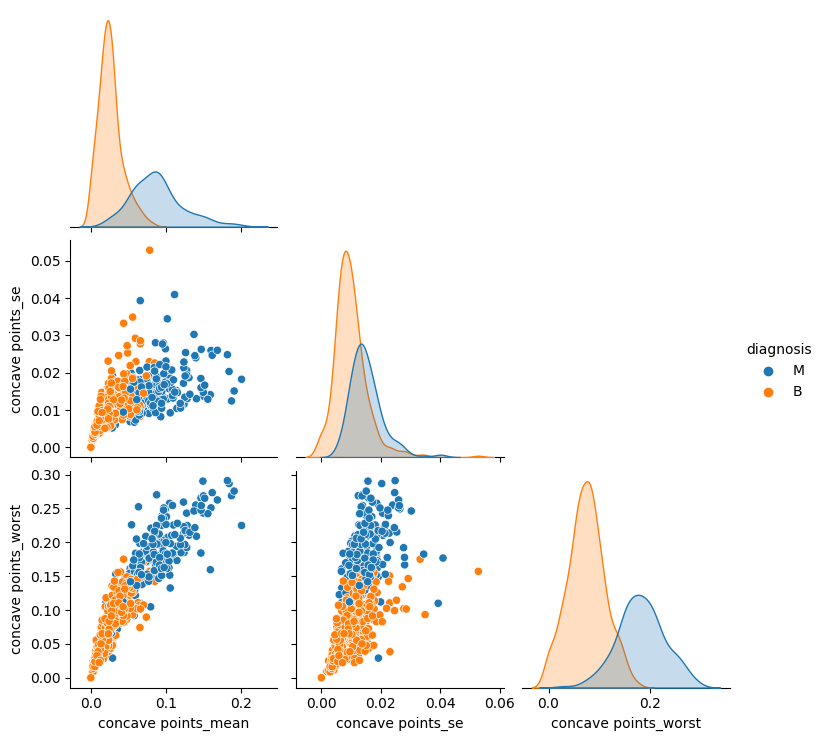

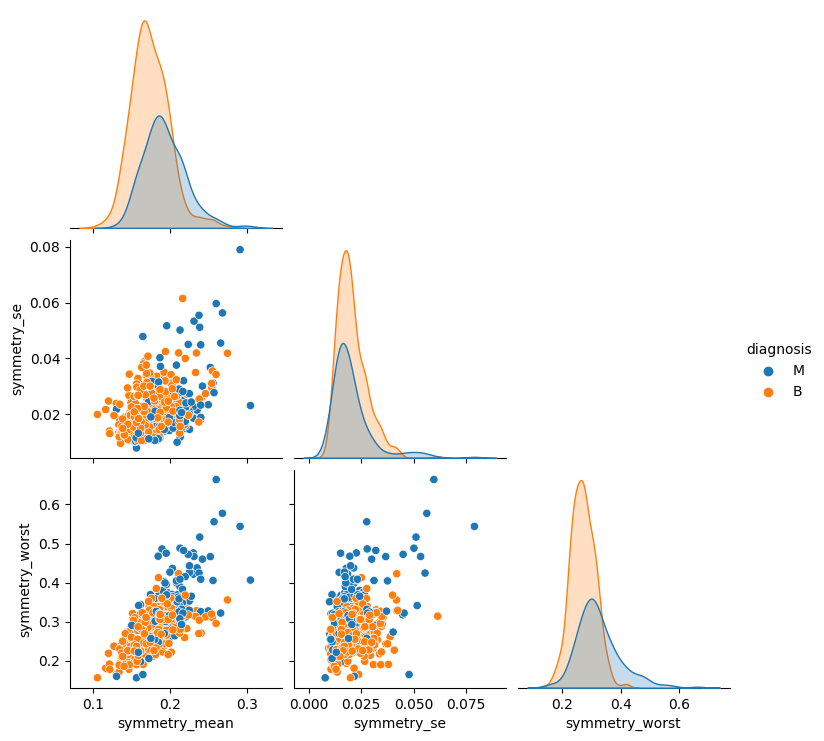

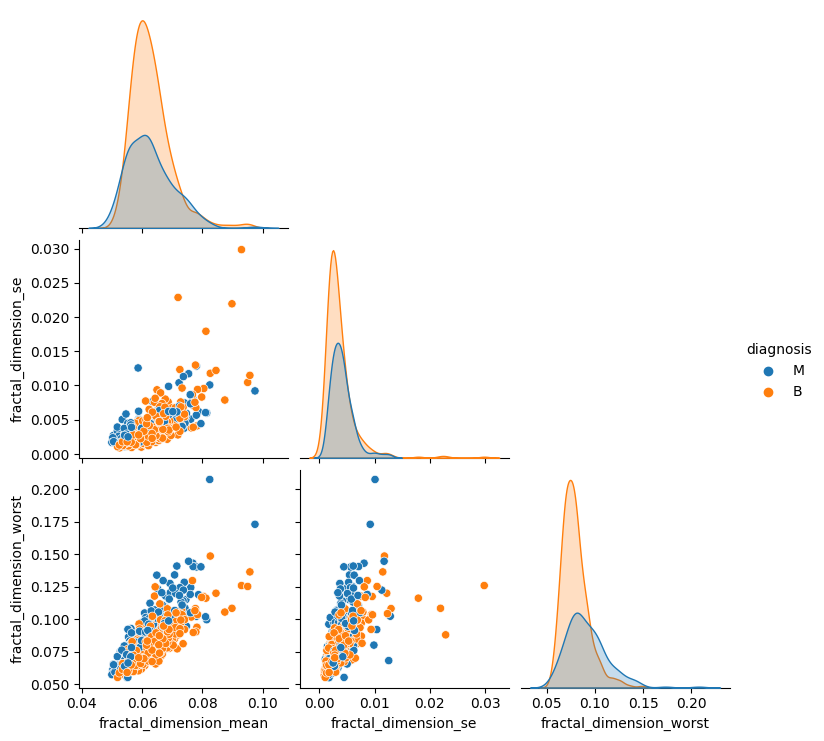

In [ ]:
i = 1
for column in columns:
  sns.pairplot(dataset[column],hue='diagnosis',corner=True)
  plt.savefig(f'subplot{i}.png')
  i += 1

**Findings:**

Upcoming above EDA, the dataset have more outliers but still we cannot impute those since those medical values related to cancer lump size. there are possibilities to extreme extend.

Upon all the features, Radius, Premeter, Area, Convatity and Convae Point are having high impact on being Malignant.

## **Data Encoding**

In [ ]:
dataset.diagnosis = dataset.diagnosis.map({'B':0,'M':1}) #0-> Not a cancer, 1-> cancer

In [ ]:
dataset.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Split

In [ ]:
X = dataset.drop('diagnosis',axis=1)
y = dataset.diagnosis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=19)

In [ ]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Scaling

In [ ]:
scaler = RobustScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling


> Logistic Regression

> SVM

> K - Nearest Neighbor

> Decision Tree

> Random Forest Classifier

> XG Boost













**Evaluation Metric**

In [ ]:
scoring = {
    'AUC_ROC': make_scorer(roc_auc_score),
    'f1_score': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score)
}

In [ ]:
score_list= []

**Logistic Regression**

In [ ]:
LogReg = LogisticRegression(max_iter=100000)

In [ ]:
Log_scores = cross_validate(LogReg, X_train, y_train, cv=10, scoring=scoring)

In [ ]:
Log_scores

{'fit_time': array([0.04741025, 0.02581668, 0.01766109, 0.02921391, 0.02543211,
        0.0252161 , 0.01832771, 0.0291276 , 0.01631403, 0.02507329]),
 'score_time': array([0.02697825, 0.02200484, 0.01658154, 0.01556492, 0.02012348,
        0.02244568, 0.02078342, 0.02542996, 0.01979375, 0.01712775]),
 'test_AUC_ROC': array([0.96551724, 1.        , 1.        , 0.94117647, 0.97058824,
        0.97058824, 0.95273109, 1.        , 0.92025862, 1.        ]),
 'test_f1_score': array([0.94444444, 1.        , 1.        , 0.9375    , 0.96969697,
        0.96969697, 0.94117647, 1.        , 0.90322581, 1.        ]),
 'test_Accuracy': array([0.95652174, 1.        , 1.        , 0.95652174, 0.97826087,
        0.97777778, 0.95555556, 1.        , 0.93333333, 1.        ]),
 'test_Precision': array([0.89473684, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.94117647, 1.        , 0.93333333, 1.        ]),
 'test_Recall': array([1.        , 1.        , 1.        , 0.88235294, 0.94117

In [ ]:
a = (LogReg.__class__.__name__,np.mean(Log_scores['test_AUC_ROC']),np.mean(Log_scores['test_f1_score']),np.mean(Log_scores['test_Accuracy']),np.mean(Log_scores['test_Precision']),np.mean(Log_scores['test_Recall']))
score_list.append(a)

In [ ]:
score_list

[('LogisticRegression',
  0.9720859895682411,
  0.9665740660878231,
  0.9757971014492753,
  0.9769246646026832,
  0.9580882352941176)]

**K Neighbors Classifier**



In [ ]:
best_k = best_score = 0
for k in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn,X_train, y_train, cv = 10).mean()
  print("K value : ", k, "test score : ", score)
  if best_score < score:
    best_score = score
    best_k = k
print(f'\n\n\n best_k : {best_k} with the score of {best_score}')

K value :  1 test score :  0.9447342995169082
K value :  2 test score :  0.9471014492753623
K value :  3 test score :  0.9581159420289855
K value :  4 test score :  0.9559420289855073
K value :  5 test score :  0.9603864734299516
K value :  6 test score :  0.9626086956521739
K value :  7 test score :  0.9604347826086956
K value :  8 test score :  0.9604347826086956
K value :  9 test score :  0.9626086956521739
K value :  10 test score :  0.9626086956521739
K value :  20 test score :  0.9626086956521739
K value :  30 test score :  0.9626086956521739



 best_k : 6 with the score of 0.9626086956521739


In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

In [ ]:
eval

{'fit_time': array([0.00657749, 0.00118399, 0.0008316 , 0.00081301, 0.00083709,
        0.00082827, 0.00082016, 0.00087333, 0.0008285 , 0.0008471 ]),
 'score_time': array([0.01193428, 0.01182485, 0.00918126, 0.00933957, 0.00904846,
        0.00898719, 0.01135778, 0.00903225, 0.00933003, 0.00904417]),
 'test_AUC_ROC': array([0.97058824, 0.94117647, 0.97058824, 0.91176471, 0.97058824,
        0.94117647, 0.90546218, 1.        , 0.90625   , 1.        ]),
 'test_f1_score': array([0.96969697, 0.9375    , 0.96969697, 0.90322581, 0.96969697,
        0.9375    , 0.88235294, 1.        , 0.89655172, 1.        ]),
 'test_Accuracy': array([0.97826087, 0.95652174, 0.97826087, 0.93478261, 0.97826087,
        0.95555556, 0.91111111, 1.        , 0.93333333, 1.        ]),
 'test_Precision': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.88235294, 1.        , 1.        , 1.        ]),
 'test_Recall': array([0.94117647, 0.88235294, 0.94117647, 0.82352941, 0.94117

In [ ]:
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

In [ ]:
score_list

[('LogisticRegression',
  0.9720859895682411,
  0.9665740660878231,
  0.9757971014492753,
  0.9769246646026832,
  0.9580882352941176),
 ('KNeighborsClassifier',
  0.9517594537815125,
  0.9466221380856924,
  0.9626086956521739,
  0.9882352941176471,
  0.9106617647058822)]

**Support Vector Classifier**

In [ ]:
svc = SVC()


param_grid = {
            'C' : [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,10.0],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree' : [2,3,4,5]
}

# Perform grid search with the SVC estimator
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Access the best Score and best parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

**Best Parameter with it's score**

In [ ]:
best_params, best_score

({'C': 4.0, 'degree': 2, 'kernel': 'rbf'}, 0.9758241758241759)

In [ ]:
model = SVC(C= best_params['C'], degree= best_params['degree'], kernel= best_params['kernel'])
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
a

('SVC',
 0.9747817661547378,
 0.9694675822262029,
 0.9779227053140096,
 0.9783625730994153,
 0.9636029411764706)

In [ ]:
score_list.append(a)

**Decision Tree Classifier**

In [ ]:
best_depth = best_score = 0
for depth in [1,2,3,4,5,6,7,8,9,10,20,30]:
  dt = DecisionTreeClassifier(max_depth=depth)
  score = np.mean(cross_val_score(dt,X_train, y_train, cv = 10, scoring = 'accuracy'))
  print("Depth Level : ", depth, "test score : ", score)
  if best_score < score:
    best_score = score
    best_depth = depth
print(f'\n\n\n best Depth : {best_depth} with the score of {best_score}')

Depth Level :  1 test score :  0.9033333333333333
Depth Level :  2 test score :  0.9056521739130435
Depth Level :  3 test score :  0.9319323671497586
Depth Level :  4 test score :  0.9275845410628019
Depth Level :  5 test score :  0.9254106280193237
Depth Level :  6 test score :  0.9232367149758455
Depth Level :  7 test score :  0.9231884057971016
Depth Level :  8 test score :  0.9165217391304349
Depth Level :  9 test score :  0.9253140096618357
Depth Level :  10 test score :  0.9166183574879228
Depth Level :  20 test score :  0.9165700483091788
Depth Level :  30 test score :  0.9230434782608696



 best Depth : 3 with the score of 0.9319323671497586


In [ ]:
model = DecisionTreeClassifier(max_depth=best_depth)
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

**XGboost**

In [ ]:
best_score = best_lr = 0
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  xgbc = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  score = np.mean(cross_val_score(xgbc,X_train, y_train, cv = 10, scoring = 'accuracy'))
  print(f'learning rate:{lr}, score:{score}')
  if best_score < score:
    best_score = score
    best_lr = lr
print(f'\n\n\n best learning rate : {best_lr} with the score of {best_score}')


learning rate:0.01, score:0.9494202898550725
learning rate:0.02, score:0.9494202898550725
learning rate:0.03, score:0.9538647342995169
learning rate:0.04, score:0.9516908212560387
learning rate:0.05, score:0.9538647342995169
learning rate:0.06, score:0.9582125603864734
learning rate:0.07, score:0.96256038647343
learning rate:0.08, score:0.9582125603864734
learning rate:0.09, score:0.96256038647343
learning rate:0.1, score:0.9582125603864734
learning rate:0.11, score:0.9603864734299516
learning rate:0.12, score:0.9603864734299516
learning rate:0.13, score:0.96256038647343
learning rate:0.14, score:0.9647826086956522
learning rate:0.15, score:0.9603864734299516
learning rate:0.2, score:0.9603864734299516
learning rate:0.3, score:0.9626086956521739
learning rate:0.4, score:0.9670048309178745
learning rate:0.5, score:0.9626570048309178
learning rate:0.6, score:0.971400966183575
learning rate:0.7, score:0.9670531400966184
learning rate:0.8, score:0.9714492753623188
learning rate:0.9, score:

In [ ]:
model = xgb.XGBClassifier(learning_rate = best_lr, n_estimators=100, verbosity = 0)
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

**Summary of Models and it's scores**

In [ ]:
score_df = pd.DataFrame(score_list,columns=['Model','Auc_Roc','F1_Score','Accuracy','Precision','Recall'])
score_df.set_index('Model',inplace=True)
score_df

Auc_Roc  F1_Score  Accuracy  Precision    Recall
Model                                                                    
LogisticRegression      0.972086  0.966574  0.975797   0.976925  0.958088
KNeighborsClassifier    0.951759  0.946622  0.962609   0.988235  0.910662
SVC                     0.974782  0.969468  0.977923   0.978363  0.963603
DecisionTreeClassifier  0.925773  0.909211  0.936280   0.942666  0.886029
RandomForestClassifier  0.947436  0.937012  0.955990   0.962908  0.915809
XGBClassifier           0.967666  0.960721  0.971449   0.971459  0.952574

## Accuracy score of test dataset

In [ ]:
final_model = SVC(C= best_params['C'], degree= best_params['degree'], kernel= best_params['kernel'])
final_model.fit(X_train, y_train)
y_pred_2 = final_model.predict(X_test)
print(accuracy_score(y_test,y_pred_2))

0.9824561403508771


In [ ]:
print(confusion_matrix(y_test,y_pred_2))

[[69  0]
 [ 2 43]]


## **Feature Importance**

In [ ]:
model = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
model.fit( X_train, y_train)
feature_im = model.feature_importances_
feature_im
import_feature =  pd.Series(feature_im, index=X.columns).abs().sort_values(ascending=False)

In [ ]:
index_names = import_feature.index[:4]
import_feature[index_names]

perimeter_worst         0.162741
concave points_mean     0.140452
concave points_worst    0.117157
radius_worst            0.092548
dtype: float64

In [ ]:
X_FI = dataset[index_names]
y_FI = dataset.diagnosis
X_train_FI, X_test_FI, y_train_FI, y_test_FI = train_test_split(X_FI,y_FI,test_size=0.20,random_state=19)
scaler = RobustScaler()
X_train_FI = scaler.fit_transform(X_train_FI)
X_test_FI = scaler.transform(X_test_FI)

In [ ]:
final_model = SVC(C= best_params['C'], degree= best_params['degree'], kernel= best_params['kernel'])
final_model.fit(X_train_FI, y_train_FI)
y_pred_FI = final_model.predict(X_test_FI)
print(accuracy_score(y_test_FI,y_pred_FI))

0.9035087719298246


## Confusition Matrix

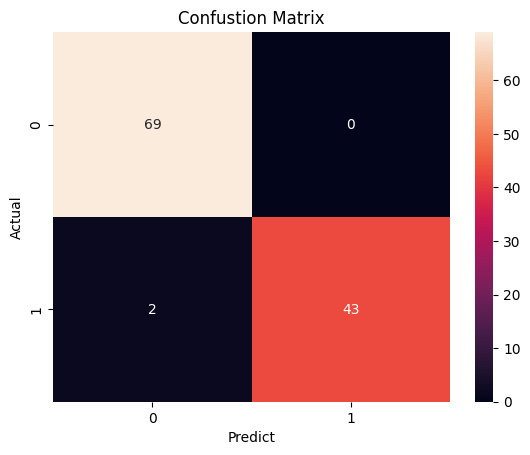

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_2),annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confustion Matrix")
plt.show()

In [ ]:
y_test.value_counts()

0    69
1    45
Name: diagnosis, dtype: int64

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_2).reshape(-1)
print(tp, fn, fp, tn)

69 0 2 43


In [ ]:
Actual = {'Name':'Actual','Benign':y_test.value_counts()[0],'Malignant':y_test.value_counts()[1]}
Predict = {'Name':'Predict','Benign':tp,'Malignant':tn}
Difference = {'Name':'Difference','Benign':fn,'Malignant':fp}

col = [Actual,Predict,Difference]
df_diff = pd.DataFrame(col).set_index('Name')
df_diff

Benign  Malignant
Name                         
Actual          69         45
Predict         69         43
Difference       0          2

# **Conclusion**

I preformed a breast prediction machine learning project using various classifiers, including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, XGBoost (XGB), and Support Vector Machine (SVM). After thorough evaluation and analysis, it was observed that the SVM classifier outperformed the others in terms of accuracy.

The results showed that the SVM classifier achieved an impressive accuracy of 97% on the training dataset and 98% on the test dataset. This indicates that the SVM model was able to effectively learn and generalize patterns from the data, leading to accurate predictions.